In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os
from google.colab import drive

drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:

# List all input files
for dirname, _, filenames in os.walk('/content/drive/MyDrive/datathon2024'):
    for filename in filenames:
        if not "chart" in filename:
            print(os.path.join(dirname, filename))

In [ ]:
def load_pie_data(filepath):
    # Load data from CSV file into a DataFrame
    data = pd.read_csv(filepath)

    # Convert string representation of lists back to actual lists
    list_data_features = ["boxes", "start_angles", "end_angles", "angles", "percentages"]
    for column in list_data_features:
        data[column] = data[column].apply(ast.literal_eval)

    return data

train_df = load_pie_data("/content/drive/MyDrive/datathon2024/train.csv")

In [ ]:
print("Number of training images:", len(train_df))
train_df.head(n=3)

Number of training images: 10000


,id,filename,boxes,start_angles,end_angles,angles,percentages
0,0,chart_0.png,"[[268, 144, 268, 148, 163, 144], [268, 148, 16...","[90.0, 92.18164140355147, 178.9087837747374]","[92.18164140355147, 178.9087837747374, 450.0]","[2.181641403551466, 86.72714237118595, 271.091...","[0.6060115009865183, 24.090872880884987, 75.30..."
1,1,chart_1.png,"[[287, 143, 287, 147, 181, 142], [287, 147, 20...","[90.54051018713066, 92.70062933739528, 168.055...","[92.70062933739528, 168.05582281155367, 450.54...","[2.160119150264622, 75.35519347415838, 282.484...","[0.6000330972957283, 20.931998187266217, 78.46..."
2,2,chart_2.png,"[[302, 94, 217, 332, 302, 228], [217, 332, 178...","[0.0, 219.2593933610481, 291.9605640200965, 33...","[219.2593933610481, 291.9605640200965, 330.945...","[219.2593933610481, 72.70117065904839, 38.9848...","[60.90538704473558, 20.19476962751344, 10.8291..."


In [ ]:
def checkSameCenter(l):
  c1,c2 = l[0][4], l[0][5]
  for x in l:
    if c1 != x[4] or c2 != x[5]:
      return False
  return True

def checkNotSameCenter(l):
  c1,c2 = l[0][4], l[0][5]
  for x in l:
    if c1 != x[4] or c2 != x[5]:
      return True
  return False

# prints number of training samples which have same center for all segments
train_df[train_df['boxes'].apply(checkNotSameCenter)].tail()

,id,filename,boxes,start_angles,end_angles,angles,percentages
9849,9849,chart_9849.png,"[[324, 153, 331, 213, 230, 195], [314, 216, 31...","[65.92450174492117, 100.55180950619228, 108.43...","[100.10503636503796, 108.43494882292201, 426.6...","[34.18053462011679, 7.883139316729729, 318.221...","[9.494592950032441, 2.1897609213138134, 88.394..."
9921,9921,chart_9921.png,"[[140, 253, 131, 249, 173, 154], [131, 249, 13...","[198.43494882292202, 203.85047390807694, 339.8...","[203.85047390807694, 339.82934658814963, 558.4...","[5.415525085154897, 135.9788726800727, 218.605...","[1.5043125236541381, 37.77190907779797, 60.723..."
9949,9949,chart_9949.png,"[[183, 1, 267, 40, 183, 112], [257, 62, 63, 12...","[0.0, 49.39870535499553, 276.74005609794693, 3...","[49.39870535499553, 276.74005609794693, 323.44...","[49.39870535499553, 227.34135074295142, 46.700...","[13.721862598609869, 63.1503752063754, 12.9723..."
9984,9984,chart_9984.png,"[[124, 245, 104, 76, 173, 154], [104, 76, 106,...","[208.30075576600638, 318.5035316447844, 320.05...","[318.5035316447844, 320.05382605006434, 568.30...","[110.20277587877806, 1.5502944052799137, 248.2...","[30.611882188549462, 0.43063733479997607, 68.9..."
9985,9985,chart_9985.png,"[[262, 101, 263, 102, 173, 154], [273, 103, 26...","[59.22596389875179, 59.981632572390915, 128.74...","[59.981632572390915, 128.74596725608353, 419.2...","[0.7556686736391214, 68.76433468369262, 290.47...","[0.20990796489975594, 19.10120407880351, 80.68..."


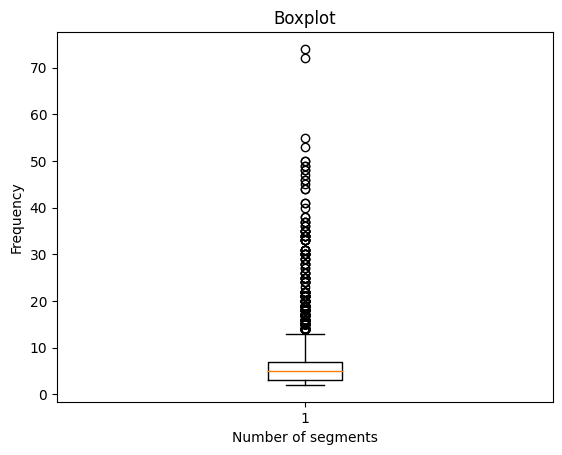

In [ ]:
num_segments = train_df["percentages"].map(lambda x: len(x))
plt.boxplot(num_segments)

plt.xlabel('Number of segments')
plt.ylabel('Number of segments')
plt.title('Boxplot')

# Show plot
plt.show()

In [ ]:
# num training samples with less than 15 segments
print(train_df["percentages"].map(lambda x: len(x))[lambda x: x<=15].count())

9657
